In [233]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [234]:
df = pd.read_csv('h1b_kaggle.csv', header=0)
df.shape

(3248, 11)

In [235]:
df.shape

(3248, 11)

In [236]:
col_names = ['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE', 'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon', 'lat']
df.columns = col_names
df.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

In [237]:
df.shape

(3248, 11)

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3248 entries, 0 to 3247
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3248 non-null   int64  
 1   CASE_STATUS         3248 non-null   object 
 2   EMPLOYER_NAME       3248 non-null   object 
 3   SOC_NAME            3248 non-null   object 
 4   JOB_TITLE           3248 non-null   object 
 5   FULL_TIME_POSITION  3248 non-null   object 
 6   PREVAILING_WAGE     3248 non-null   float64
 7   YEAR                3248 non-null   int64  
 8   WORKSITE            3248 non-null   object 
 9   lon                 3032 non-null   float64
 10  lat                 3032 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 279.2+ KB


In [239]:
for col in col_names:
    print(df[col].value_counts())

1       1
2170    1
2160    1
2161    1
2162    1
       ..
1086    1
1087    1
1088    1
1089    1
3248    1
Name: Unnamed: 0, Length: 3248, dtype: int64
CERTIFIED              2593
CERTIFIED-WITHDRAWN     282
DENIED                  215
WITHDRAWN               158
Name: CASE_STATUS, dtype: int64
ADOBE SYSTEMS INCORPORATED            34
WAL-MART ASSOCIATES, INC.             17
APPLE INC.                            13
SNAPRAYS, LLC                         13
CUMMINS INC.                          11
                                      ..
ACCRETIVE, LLC                         1
DIVERSIFIED SERVICES NETWORK, INC.     1
MCKASKLE INDUSTRIAL COMPLEX, INC.      1
MEDIAKEYS INC.                         1
AT&T MOBILITY SERVICES LLC             1
Name: EMPLOYER_NAME, Length: 2389, dtype: int64
GENERAL AND OPERATIONS MANAGERS        1998
CHIEF EXECUTIVES                        593
ADVERTISING AND PROMOTIONS MANAGERS     378
MARKETING MANAGERS                      270
MARKETING MANAGER         

In [240]:
df.isnull().sum()

Unnamed: 0              0
CASE_STATUS             0
EMPLOYER_NAME           0
SOC_NAME                0
JOB_TITLE               0
FULL_TIME_POSITION      0
PREVAILING_WAGE         0
YEAR                    0
WORKSITE                0
lon                   216
lat                   216
dtype: int64

In [241]:
# remove columns log and lat
df = df.drop(columns=['lon', 'lat'])

In [242]:
df.isnull().sum()

Unnamed: 0            0
CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
WORKSITE              0
dtype: int64

In [243]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['CASE_STATUS']), df['CASE_STATUS'], test_size=0.2, random_state=42)

In [244]:
X_train.shape, X_test.shape

((2598, 8), (650, 8))

In [245]:
X_train.dtypes

Unnamed: 0              int64
EMPLOYER_NAME          object
SOC_NAME               object
JOB_TITLE              object
FULL_TIME_POSITION     object
PREVAILING_WAGE       float64
YEAR                    int64
WORKSITE               object
dtype: object

In [246]:
import category_encoders as ce

In [247]:
encoder = ce.OrdinalEncoder(cols=['EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE', 'FULL_TIME_POSITION', 'WORKSITE'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [248]:
X_train.head()

,Unnamed: 0,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
794,795,1,1,1,1,57033.6,2016,1
670,671,2,1,2,2,121014.0,2016,2
3011,3012,3,2,3,2,135678.0,2016,3
2225,2226,4,1,4,2,104915.0,2016,4
1188,1189,5,1,5,2,74402.0,2016,5


In [249]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [250]:
y_pred = clf.predict(X_test)

In [251]:
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.823076923076923


[Text(0.41346153846153844, 0.9166666666666666, 'x[0] <= 2975.5\nentropy = 1.032\nsamples = 2598\nvalue = [2078, 224, 170, 126]'),
 Text(0.1346153846153846, 0.75, 'x[0] <= 18.0\nentropy = 0.902\nsamples = 2381\nvalue = [1988, 132, 165, 96]'),
 Text(0.038461538461538464, 0.5833333333333334, 'x[7] <= 365.0\nentropy = 0.567\nsamples = 15\nvalue = [0, 13, 0, 2]'),
 Text(0.019230769230769232, 0.4166666666666667, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10, 0, 0]'),
 Text(0.057692307692307696, 0.4166666666666667, 'x[0] <= 11.0\nentropy = 0.971\nsamples = 5\nvalue = [0, 3, 0, 2]'),
 Text(0.038461538461538464, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0, 0]'),
 Text(0.23076923076923078, 0.5833333333333334, 'x[0] <= 651.5\nentropy = 0.881\nsamples = 2366\nvalue = [1988, 119, 165, 94]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[0] <= 597.0\nentropy = 1.207\nsamples = 479\nvalue = [357, 54, 42, 

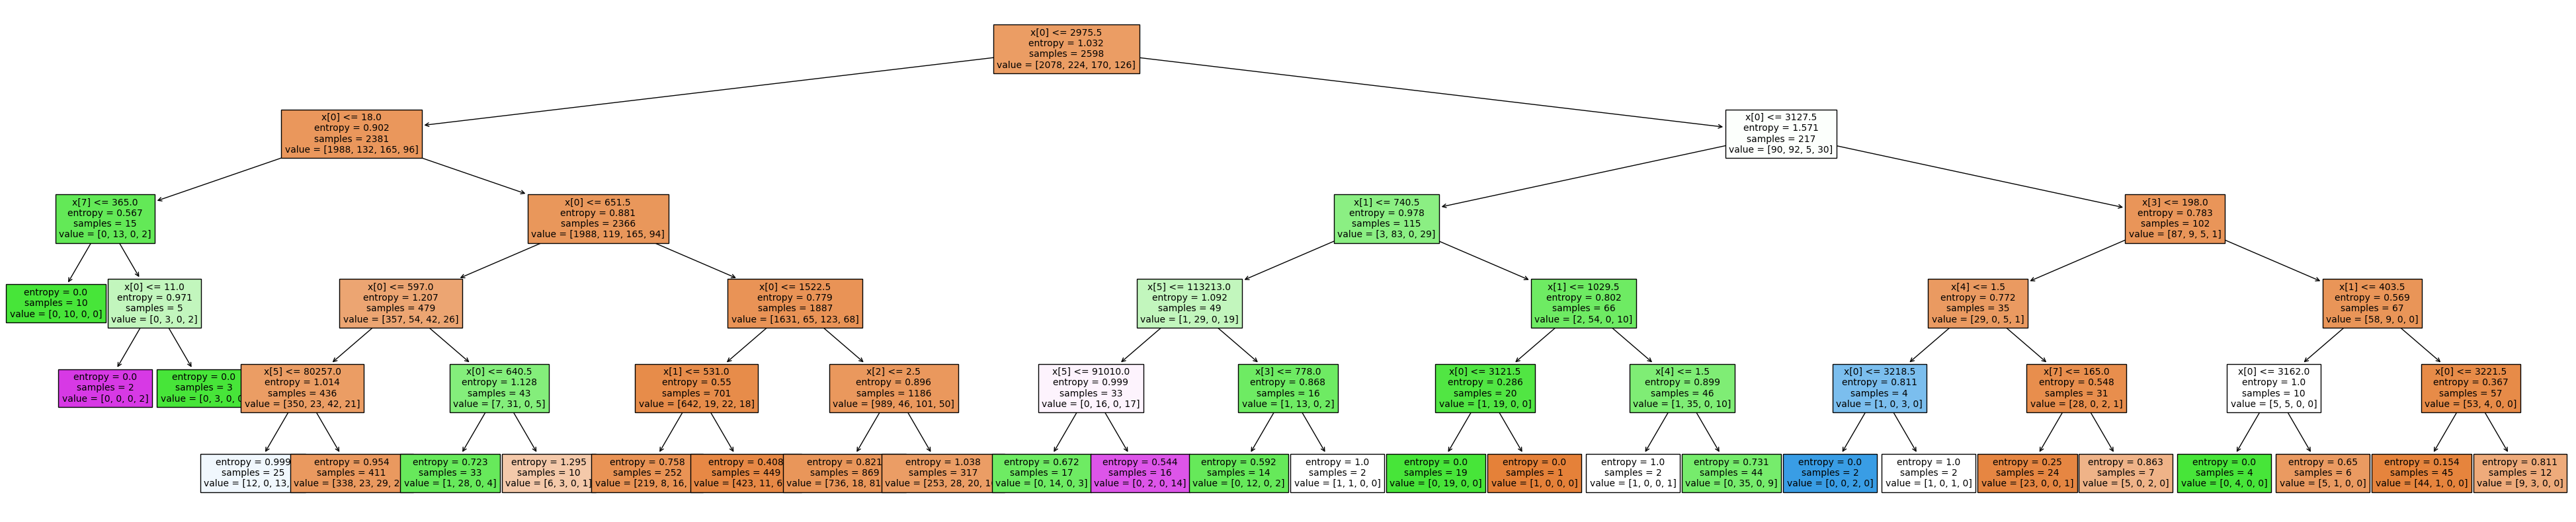

In [252]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 10))

from sklearn import tree

tree.plot_tree(clf, filled=True, fontsize=10)

In [253]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[499   4  12   0]
 [ 18  33   0   7]
 [ 43   0   2   0]
 [ 25   6   0   1]]


In [254]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

          CERTIFIED       0.85      0.97      0.91       515
CERTIFIED-WITHDRAWN       0.77      0.57      0.65        58
             DENIED       0.14      0.04      0.07        45
          WITHDRAWN       0.12      0.03      0.05        32

           accuracy                           0.82       650
          macro avg       0.47      0.40      0.42       650
       weighted avg       0.76      0.82      0.78       650

